In [6]:
# Read the machine_temp_failure_missing.csv dataset into a Pandas DataFrame, must use PathLib. Inspect the dataset, and look for missing values if there are any. Find statistics such as mean, max, min. Rename the value column to temperature.
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# mtfm = pd.read_csv('https://drive.google.com/file/d/17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG/view?usp=sharing')
temp_failure_missing = Path("machine_temp_failure_missing.csv")
mtfm = pd.read_csv(temp_failure_missing)

In [8]:
mtfm.head(10)

,timestamp,value
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
5,02-12-2013 21:40,78.710418
6,02-12-2013 21:45,80.269784
7,02-12-2013 21:50,80.272828
8,02-12-2013 21:55,80.353425
9,02-12-2013 22:00,79.486523


In [9]:
mtfm.shape

(22695, 2)

In [10]:
# null values
mtfm.isnull().sum()


timestamp       0
value        1285
dtype: int64

### 1285 null values in the column:  value

In [11]:
mtfm.describe()

,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [12]:
# rename value column to temperature
mtfm = mtfm.rename(columns={"value": "temperature"})

In [13]:
# delta temp column temp[t+1] - temp[t]
mtfm['delta_temp'] = mtfm['temperature'].shift(-1) - mtfm['temperature']
mtfm.head(10)


,timestamp,temperature,delta_temp
0,02-12-2013 21:15,73.967322,0.968560
1,02-12-2013 21:20,74.935882,1.188280
2,02-12-2013 21:25,76.124162,2.016546
3,02-12-2013 21:30,78.140707,1.189128
4,02-12-2013 21:35,79.329836,-0.619417
5,02-12-2013 21:40,78.710418,1.559366
6,02-12-2013 21:45,80.269784,0.003044
7,02-12-2013 21:50,80.272828,0.080597
8,02-12-2013 21:55,80.353425,-0.866902
9,02-12-2013 22:00,79.486523,1.296754


In [14]:
mtfm['timestamp'] = pd.to_datetime(mtfm['timestamp'], format = "%d-%m-%Y %H:%M")

In [15]:
mtfm.head(10)

,timestamp,temperature,delta_temp
0,2013-12-02 21:15:00,73.967322,0.968560
1,2013-12-02 21:20:00,74.935882,1.188280
2,2013-12-02 21:25:00,76.124162,2.016546
3,2013-12-02 21:30:00,78.140707,1.189128
4,2013-12-02 21:35:00,79.329836,-0.619417
5,2013-12-02 21:40:00,78.710418,1.559366
6,2013-12-02 21:45:00,80.269784,0.003044
7,2013-12-02 21:50:00,80.272828,0.080597
8,2013-12-02 21:55:00,80.353425,-0.866902
9,2013-12-02 22:00:00,79.486523,1.296754


In [16]:
mtfm.set_index('timestamp', inplace=True)

### Plots_of_Temp and delta_Temp

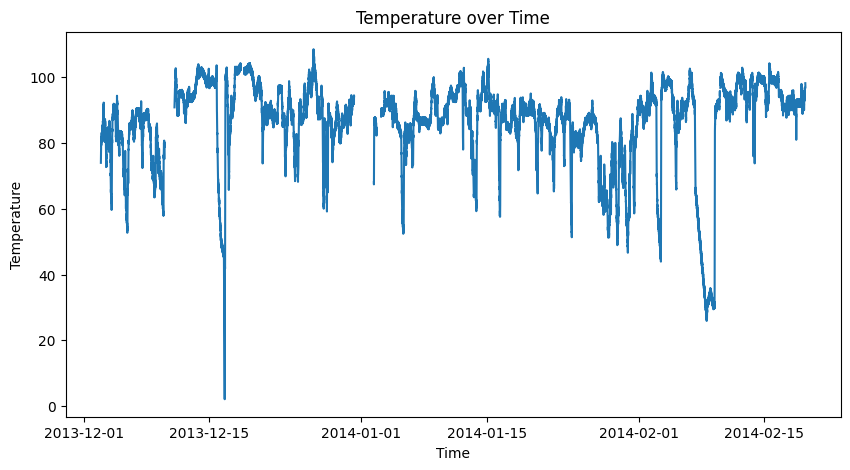

:Curve   [timestamp]   (temperature)

In [17]:
# Plot the temperature data using matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas



# Using Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(mtfm.index, mtfm['temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()

# Using hvPlot
mtfm.hvplot( y='temperature',use_index = True, title='Temperature over Time')




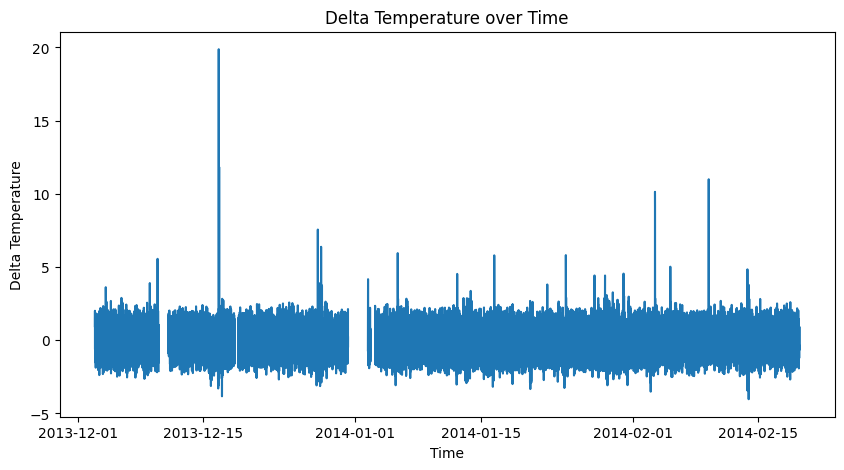

:Curve   [timestamp]   (delta_temp)

In [18]:
# Using Matplotlib for delta_temperature
plt.figure(figsize=(10, 5))
plt.plot(mtfm.index, mtfm['delta_temp'])
plt.xlabel('Time')
plt.ylabel('Delta Temperature')
plt.title('Delta Temperature over Time')
plt.show()

# Using hvPlot for delta_temperature
mtfm.hvplot( y='delta_temp', use_index = True, title='Delta Temperature over Time')

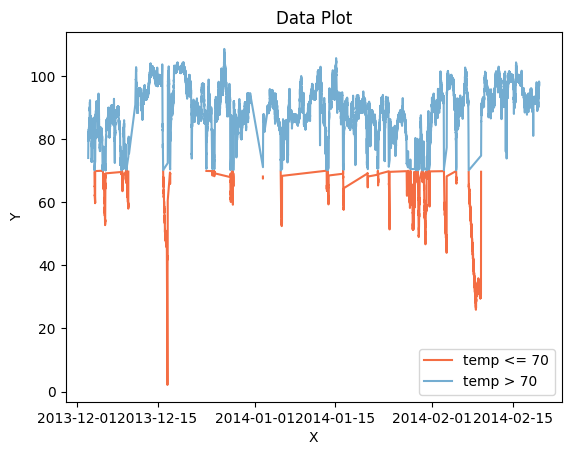

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create a mask for values greater than 40
mask = mtfm['temperature'] > 70

# Create a colormap with two colors
cmap = plt.cm.get_cmap('RdYlBu')

# Plot the values with different colors based on the mask
plt.plot(mtfm.index[~mask], mtfm['temperature'][~mask], color=cmap(0.2), label='temp <= 70')
plt.plot(mtfm.index[mask], mtfm['temperature'][mask],  color=cmap(0.8), label='temp > 70')

# Set plot title and labels
plt.title('Data Plot')
plt.xlabel('X')
plt.ylabel('Y')

# Add a colorbar for reference
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
# sm.set_array([])
# plt.colorbar(sm, label='Value')

# Add legend
plt.legend()

# size of the figure
# plt.figure(figsize=(17, 3))


# Display the plot
plt.show()


In [20]:
def rmse_score(df1, df2, col=None):
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [21]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [22]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):   
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

In [23]:
# duplicate the dataset
mtfm_mean = mtfm.copy()


In [24]:
  # Univeariate  imputation on temperature column using mean
mtfm_mean['temperature'].fillna(method = 'mean', inplace = True)

In [25]:
mtfm.head(10)

,temperature,delta_temp
timestamp,,
2013-12-02 21:15:00,73.967322,0.968560
2013-12-02 21:20:00,74.935882,1.188280
2013-12-02 21:25:00,76.124162,2.016546
2013-12-02 21:30:00,78.140707,1.189128
2013-12-02 21:35:00,79.329836,-0.619417
2013-12-02 21:40:00,78.710418,1.559366
2013-12-02 21:45:00,80.269784,0.003044
2013-12-02 21:50:00,80.272828,0.080597
2013-12-02 21:55:00,80.353425,-0.866902


In [26]:
temp_failure_original = Path("machine_temp_failure_original.csv")
mtfm_original = pd.read_csv(temp_failure_original)

In [27]:
mtfm_original.head(10)

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836
5,2013-12-02 21:40:00,78.710418
6,2013-12-02 21:45:00,80.269784
7,2013-12-02 21:50:00,80.272828
8,2013-12-02 21:55:00,80.353425
9,2013-12-02 22:00:00,79.486523


In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_error= sqrt(mean_squared_error(mtfm_original['value'], mtfm_mean['temperature']))
mean_error


5.873128567455812

In [29]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

rmse_mean = sqrt(mean_squared_error(mtfm_original['value'], mtfm['temperature'].fillna(mtfm['temperature'].mean(), inplace=False)))
rmse_ffill = sqrt(mean_squared_error(mtfm_original['value'], mtfm['temperature'].fillna(method='ffill' , inplace=False)))
rmse_bfill = sqrt(mean_squared_error(mtfm_original['value'], mtfm['temperature'].fillna(method='bfill',  inplace=False)))
rmse_liner = sqrt(mean_squared_error(mtfm_original['value'], mtfm['temperature'].interpolate(method='linear', inplace=False)))
rmse_simpleimputer = sqrt(mean_squared_error(mtfm_original['value'], imputer.fit_transform(mtfm[['temperature']])))
print('''
      rmse_mean: {}
      rmse_ffill: {}
      rmse_bfill: {}
      rmse_liner: {}
      rmse_simpleimputer: {}
      '''.format(rmse_mean, rmse_ffill, rmse_bfill,rmse_liner, rmse_simpleimputer))



      rmse_mean: 3.961536496226712
      rmse_ffill: 2.4939956524274454
      rmse_bfill: 5.873128567455812
      rmse_liner: 4.043203597694257
      rmse_simpleimputer: 3.961536496226712
      


In [66]:
mtfm_ffill = mtfm.copy()
mtfm_ffill['temperature'].fillna(method = 'ffill', inplace = True)
mtfm_ffill['delta_temp'].fillna(method = 'ffill', inplace = True)


<AxesSubplot: title={'center': 'Temperature vs Time'}, xlabel='timestamp', ylabel='Temperature'>

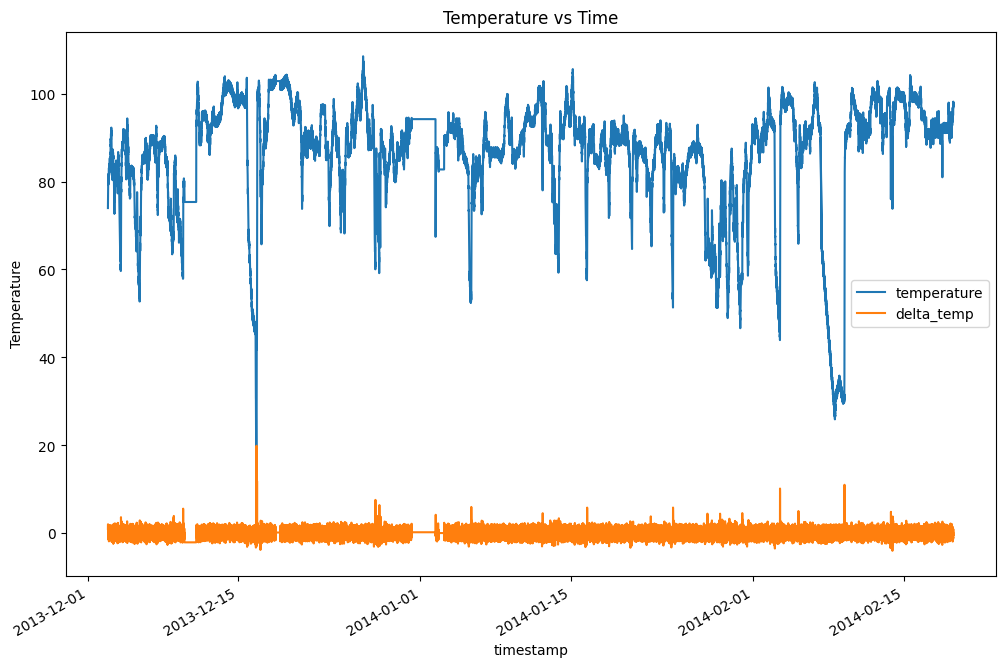

In [67]:
mtfm_ffill.plot(
    ylabel='Temperature',
    title='Temperature vs Time',
    figsize=(12, 8)
)

In [31]:
temp_failure_original = Path("machine_temp_failure_original.csv")
mtfm_original = pd.read_csv(temp_failure_original)

In [32]:
# rename value column to temperature
mtfm_original = mtfm_original.rename(columns={"value": "temperature"})
mtfm_original['timestamp'] = pd.to_datetime(mtfm_original['timestamp'], format = "%Y-%m-%d %H:%M:%S")
mtfm_original.set_index('timestamp', inplace=True)


<AxesSubplot: title={'center': 'Temperature vs Time'}, xlabel='timestamp', ylabel='Temperature'>

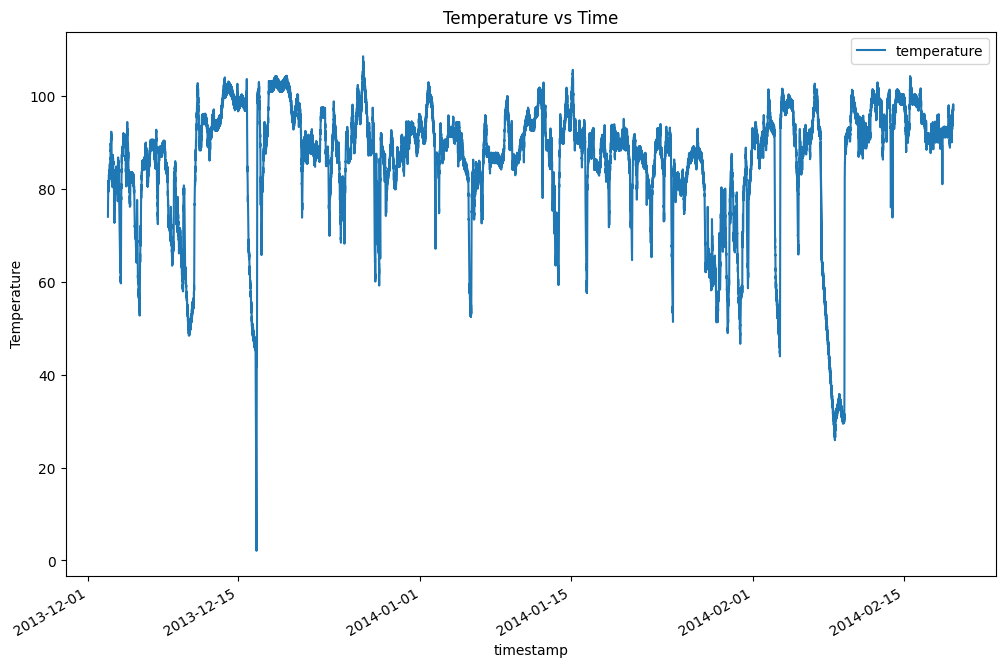

In [33]:
mtfm_original.plot(
    ylabel='Temperature',
    title='Temperature vs Time',
    figsize=(12, 8)
)

In [68]:
# frequency of the data
frequency_original = mtfm_ffill.index[1] - mtfm_ffill.index[0]
print(frequency_original) # 5 minutes

0 days 00:05:00


In [69]:
# frequency of temperature and resample to hourly
mtfm_ffill = mtfm_ffill.resample('H').mean()


<AxesSubplot: title={'center': 'Temperature vs Time'}, xlabel='timestamp', ylabel='Temperature'>

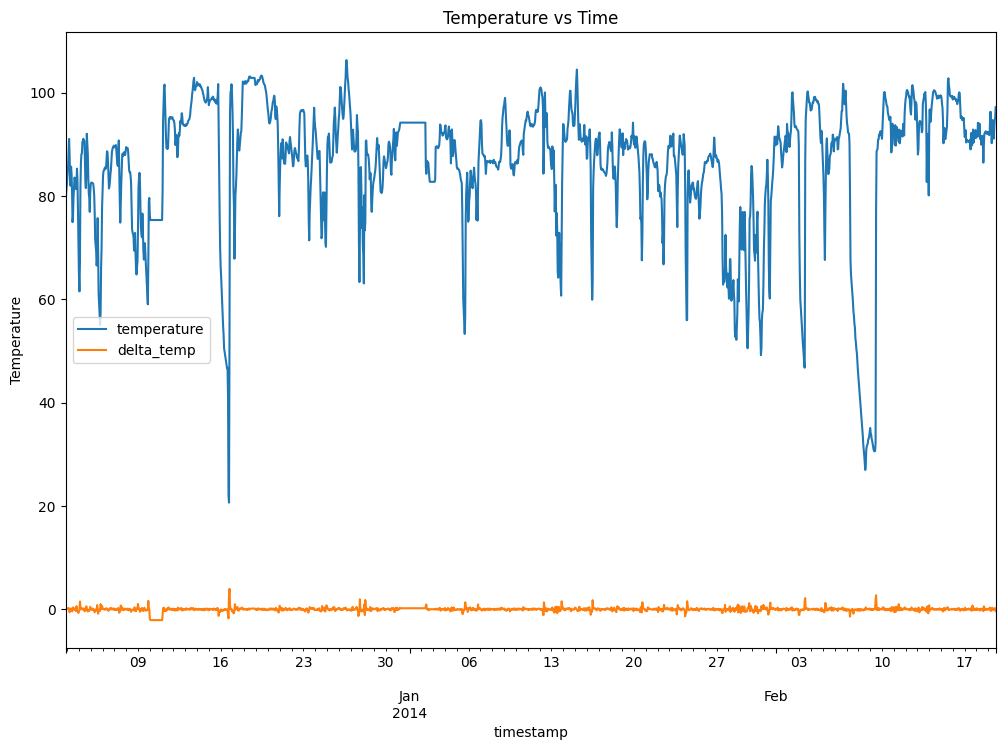

In [70]:
mtfm_ffill.plot( 
    ylabel='Temperature',
    title='Temperature vs Time',
    figsize=(12, 8)
)

<AxesSubplot: >

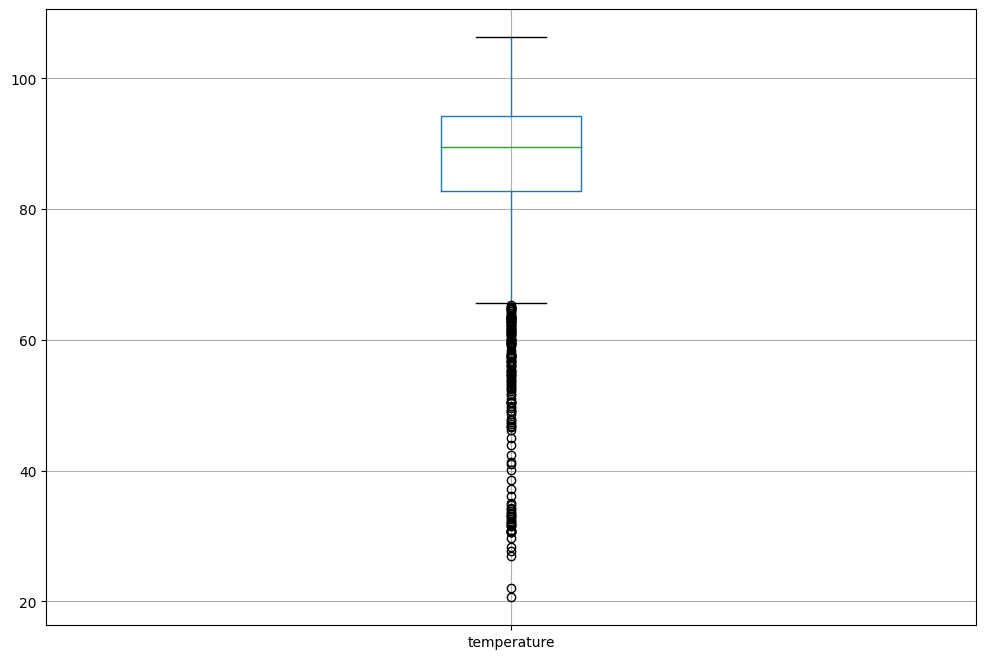

In [71]:
# Boxplot of temperature
mtfm_ffill.boxplot(column=['temperature'], figsize=(12, 8))

<AxesSubplot: title={'center': 'temperature'}, xlabel='temperature'>

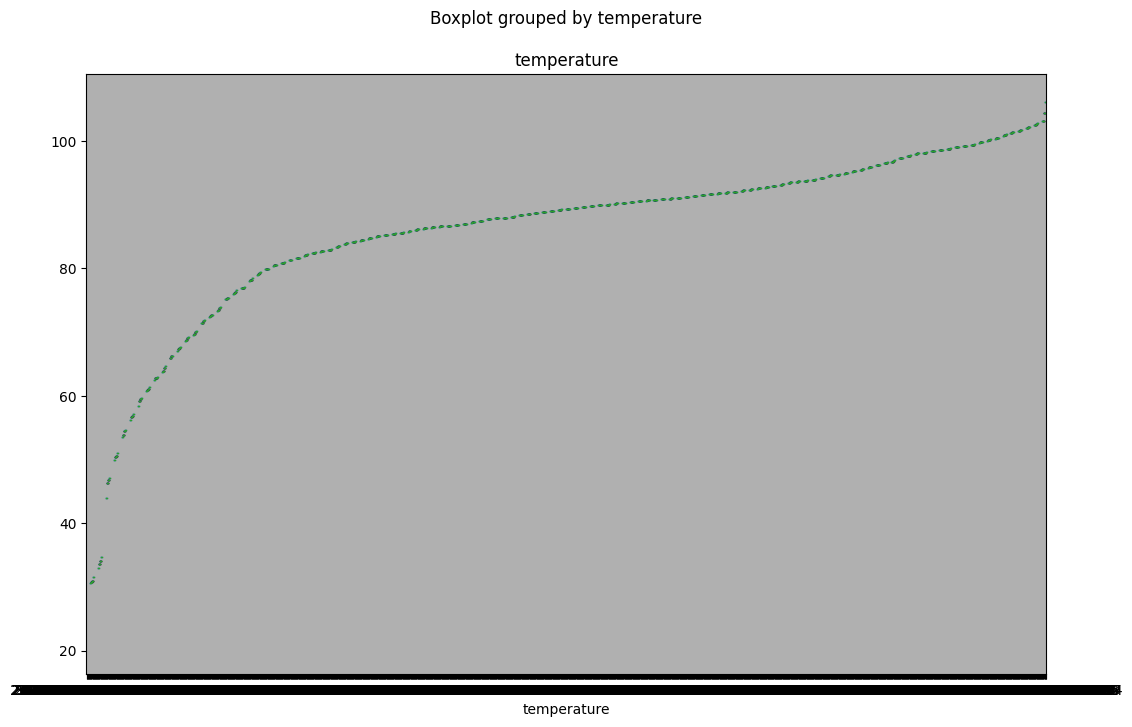

In [72]:
#Boxen plot of temperature
mtfm_ffill.boxplot(column=['temperature'], figsize=(12, 8), by='temperature')

OptionError: No such keys(s): 'mode.use_inf_as_null'

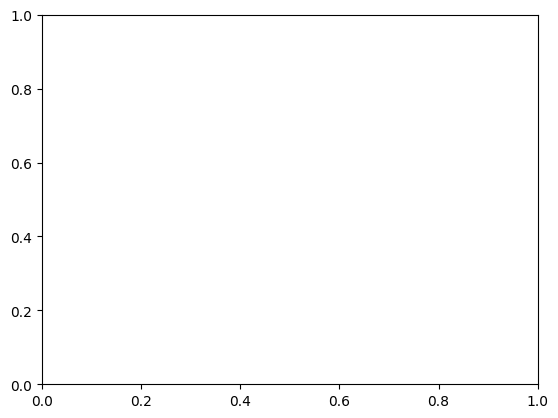

In [73]:
# B0xen plot of temperature
import seaborn as sns
sns.boxenplot(x=mtfm_ffill['temperature']) #-- obtaining error here No such keys(s): 'mode.use_inf_as_null'
# check for infinate values
mtfm_ffill.isin([np.inf, -np.inf]).sum()

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

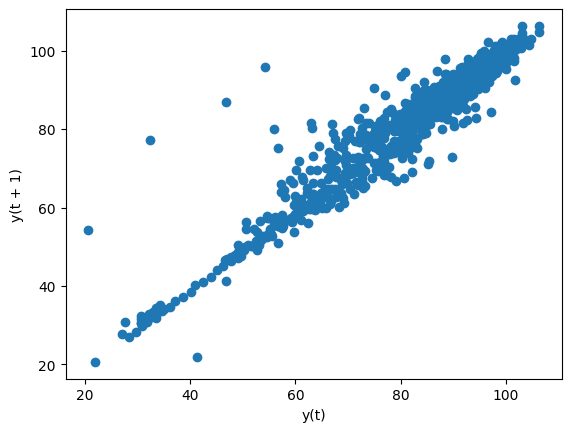

In [76]:
# lag plot of temperature'
from pandas.plotting import lag_plot
lag_plot(mtfm_ffill['temperature'])


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

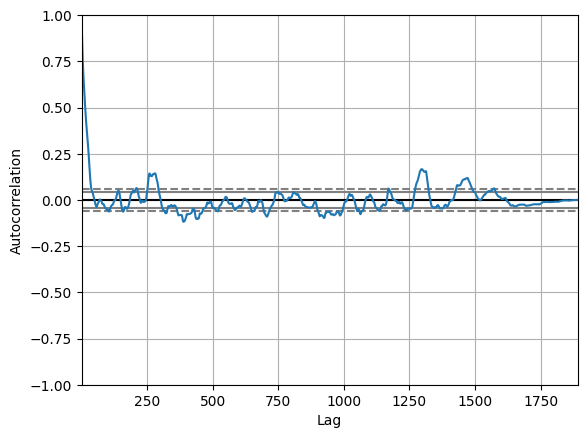

In [77]:
# plotting temperature vs frequency of temperature
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(mtfm_ffill['temperature'])


<AxesSubplot: >

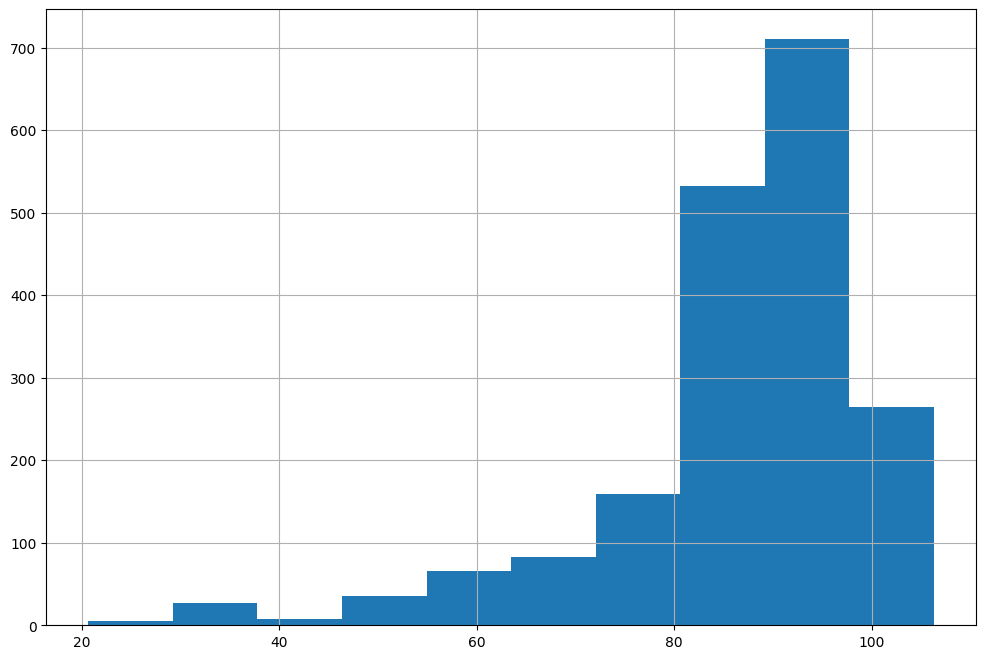

In [78]:
mtfm_ffill['temperature'].hist(figsize=(12, 8))

<AxesSubplot: ylabel='Density'>

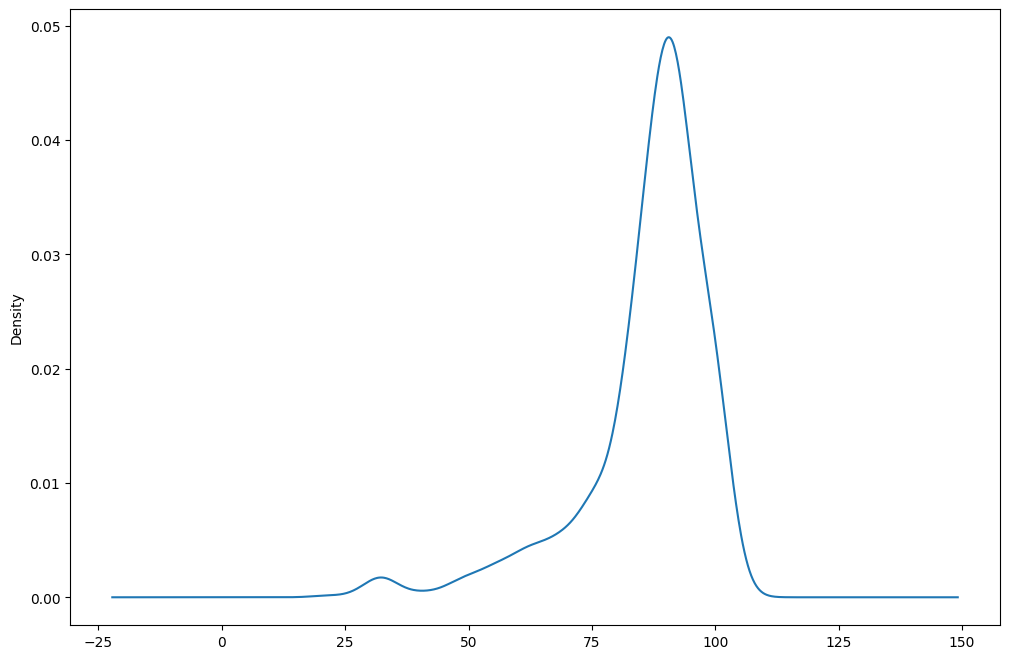

In [79]:
mtfm_ffill['temperature'].plot(kind='kde', figsize=(12, 8))

In [80]:
mtfm_ffill['temperature'].describe()

count    1891.000000
mean       86.126685
std        13.291729
min        20.641281
25%        82.751587
50%        89.476799
75%        94.204409
max       106.303664
Name: temperature, dtype: float64

In [ ]:
# Conclusion
# The temperature data is not stationary. It has a trend and seasonality.
# The temperature data is not normally distributed. It is skewed to the right.
# The temperature data is autocorrelated. The lag plot shows a linear relationship between the data and its lagged values.
# The temperature data has outliers. The boxplot shows a number of outliers in the data.


In [81]:
#  Define iqr_outliers() function for this data, and find the outliers.
def iqr_outliers(DATA_FRAME, COLUMN_NAME):
    # getting outliers using IQR
    q1 = DATA_FRAME[COLUMN_NAME].quantile(0.25)
    q3 = DATA_FRAME[COLUMN_NAME].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = DATA_FRAME[(DATA_FRAME[COLUMN_NAME] < lower_bound) | (DATA_FRAME[COLUMN_NAME] > upper_bound)]
    return outliers
iqr_outliers(mtfm_ffill, 'temperature')

,temperature,delta_temp
timestamp,,
2013-12-04 00:00:00,64.696206,-0.320622
2013-12-04 01:00:00,61.532599,-0.226645
2013-12-05 16:00:00,61.150198,-0.236645
2013-12-05 17:00:00,59.192719,-0.279826
2013-12-05 18:00:00,57.223873,-0.015584
...,...,...
2014-02-09 07:00:00,30.880488,-0.040392
2014-02-09 08:00:00,30.632596,0.065171
2014-02-09 09:00:00,30.583324,0.001818


timestamp
2013-12-02 21:00:00   -0.610537
2013-12-02 22:00:00   -0.415948
2013-12-02 23:00:00   -0.338682
2013-12-03 00:00:00   -0.237834
2013-12-03 01:00:00   -0.120194
                         ...   
2014-02-19 11:00:00    0.374116
2014-02-19 12:00:00    0.525895
2014-02-19 13:00:00    0.647455
2014-02-19 14:00:00    0.675775
2014-02-19 15:00:00    0.833031
Freq: H, Name: temperature, Length: 1891, dtype: float64


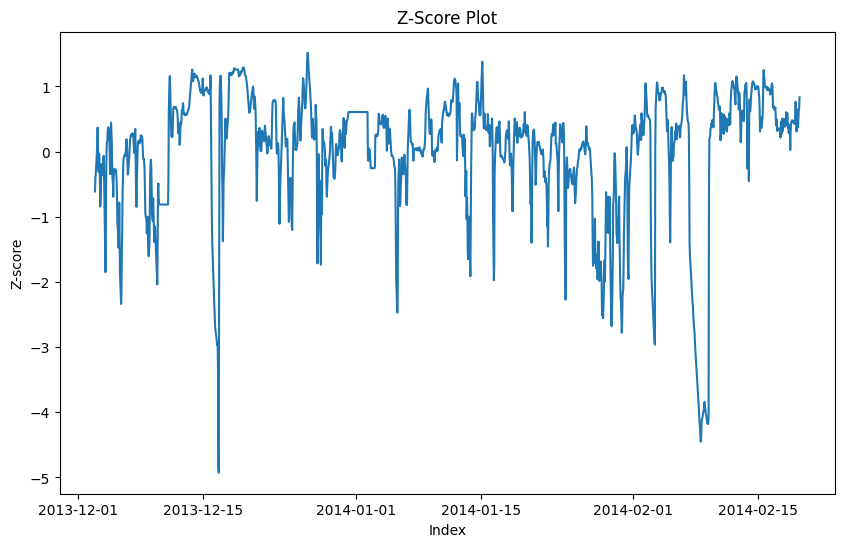

In [82]:
# compute the z-score and plot the z-score using hvplot
z = (mtfm_ffill['temperature'] - mtfm_ffill['temperature'].mean()) / mtfm_ffill['temperature'].std()
print(z)

# plot the z-score using hvplot
plt.figure(figsize=(10, 6))
plt.plot(z)
plt.xlabel('Index')
plt.ylabel('Z-score')
plt.title('Z-Score Plot')
plt.show()
